##Домашняя работа #1.
##Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

* Soft deadline: **20.02.2023 03:00:00 +0003 GMT** 
* Hard deadline: **27.02.2023 03:00:00 +0003 GMT**

In [1]:
import cv2 as cv
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import copy

import numpy as np

In [2]:
!curl "https://upload.wikimedia.org/wikipedia/ru/2/24/Lenna.png" -o lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6066k  100 6066k    0     0  2214k      0  0:00:02  0:00:02 --:--:-- 2216k


##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами: 
* c помощью функций split & merge
* с помощью индексации в numpy 
* с помощью cvtColor

/var/folders/sj/0rdnk85n127gn0z4zk37yd680000gq/T/ipykernel_32010/2713184095.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231),plt.imshow(img1,'gray'),plt.title('split & merge')


(<AxesSubplot: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'))

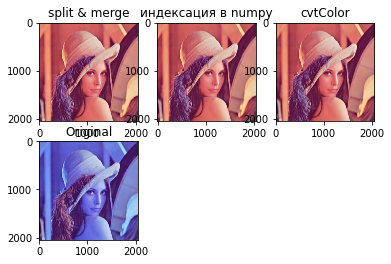

In [3]:
## your code here
lena = cv.imread("lena.png")
plt.imshow(lena)

b, g, r = cv.split(lena)
img1 = cv.merge((r, g, b))
img2 = cv.cvtColor(lena, cv.COLOR_BGR2RGB)
img3 = lena[:, :, ::-1]

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('split & merge')
plt.subplot(232),plt.imshow(img3,'gray'),plt.title('индексация в numpy')
plt.subplot(233),plt.imshow(img2,'gray'),plt.title('cvtColor')
plt.subplot(234),plt.imshow(lena,'gray'),plt.title('Original')

##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

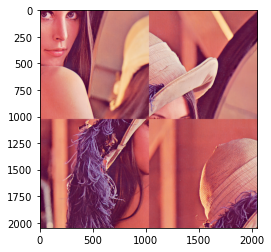

In [4]:
## your code here
import copy
lena = img1
lena_2 = copy.deepcopy(img1)
lena_2[lena.shape[0] // 2:, lena.shape[1] // 2:, :] = lena[:lena.shape[0] // 2, :lena.shape[1] // 2, :]
lena_2[:lena.shape[0] // 2, :lena.shape[1] // 2, :] = lena[lena.shape[0] // 2:, lena.shape[1] // 2:, :]
plt.imshow(lena_2)

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране. 

(<AxesSubplot: title={'center': 'lena_diff'}>,
 Text(0.5, 1.0, 'lena_diff'))

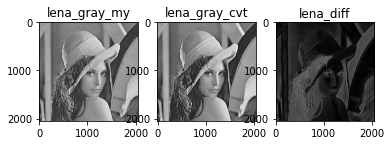

In [5]:
## your code here
lena_gray_my = copy.deepcopy(lena)
lena_gray_my = lena_gray_my.mean(axis=-1)

lena_gray_cvt = copy.deepcopy(lena)
lena_gray_cvt = cv.cvtColor(lena_gray_cvt, cv.COLOR_RGB2GRAY )
lena_diff = np.abs(lena_gray_cvt - lena_gray_my)

plt.subplot(231),plt.imshow(lena_gray_my, cmap='gray'),plt.title('lena_gray_my')
plt.subplot(232),plt.imshow(lena_gray_cvt, cmap='gray'),plt.title('lena_gray_cvt')
plt.subplot(233),plt.imshow(lena_diff, cmap='gray'),plt.title('lena_diff')

##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

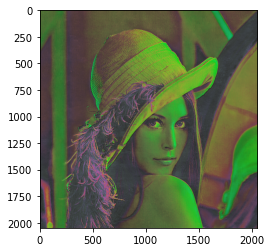

In [6]:
## your code here
lena_4 = copy.deepcopy(lena)
lena_hsv = cv.cvtColor(lena, cv.COLOR_RGB2HSV)
lena_hsv[:, :, 2:] = 255 - lena_hsv[:, :, 2:] 
lena_hsv = cv.cvtColor(lena, cv.COLOR_HSV2RGB)
plt.imshow(lena_hsv)

##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

(<AxesSubplot: title={'center': 'bgr'}>,
 Text(0.5, 1.0, 'bgr'))

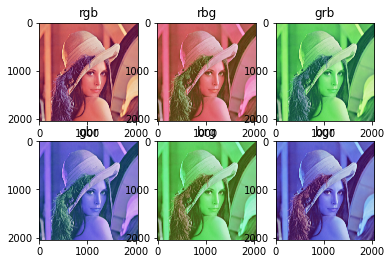

In [7]:
## your code here
## your code here
lena_5 = copy.deepcopy(lena)
r, g, b = cv.split(lena_5)
img1 = cv.merge((r, g, b))
img2 = cv.merge((r, b, g))
img3 = cv.merge((g, r, b))
img4 = cv.merge((g, b, r))
img5 = cv.merge((b, r, g))
img6 = cv.merge((b, g, r))

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('rgb')
plt.subplot(232),plt.imshow(img2,'gray'),plt.title('rbg')
plt.subplot(233),plt.imshow(img3,'gray'),plt.title('grb')
plt.subplot(234),plt.imshow(img4,'gray'),plt.title('gbr')
plt.subplot(235),plt.imshow(img5,'gray'),plt.title('brg')
plt.subplot(236),plt.imshow(img6,'gray'),plt.title('bgr')


####Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

(<AxesSubplot: title={'center': 'norm_equ_diff'}>,
 Text(0.5, 1.0, 'norm_equ_diff'))

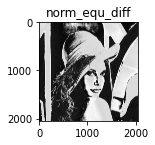

In [8]:
## your code here
lena_6 = copy.deepcopy(lena)
lena_gray_my = cv.cvtColor(lena_6, cv.COLOR_RGB2GRAY)

equ = cv.equalizeHist(lena_gray_my)
norm = img_normalized = cv.normalize(lena_gray_my, None, 0, 255.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
norm_equ_diff = np.abs(lena_gray_my - equ)

plt.subplot(236), plt.imshow((norm_equ_diff).astype(np.uint8), 'gray'), plt.title('norm_equ_diff')

####Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

(<matplotlib.image.AxesImage at 0x14cb70a30>, Text(0.5, 1.0, 'p=0.5'))

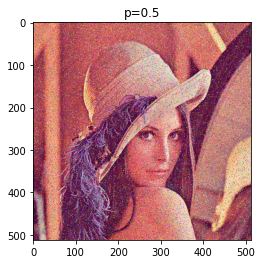

In [9]:
## your code here


## solt_n_pepper
def solt_n_pepper(src, p, q):
    img = copy.deepcopy(src)
    n, m = img.shape
    val1, val2, val3, val4 = 1 - ((1-p) * (1-q)), ((1-p) * (1-q)), p / (p+q), 1 - (p / (p+q))
    for i in range(n):
        for j in range(m):
            choice = np.random.choice([0, 1], p=[val1, val2])
            if choice:
                continue
            else:
                img[i][j] = 255 * np.random.choice([0, 1], p=[val3, val4])
    return img


# copy lena
lena_7 = copy.deepcopy(lena)
shape = np.array(lena_7.shape)
shape[0] = shape[0] // 2 ** 2
shape[1] = shape[1] // 2 ** 2

lena_7 = cv.resize(lena_6, shape[0:2])

# split and init probs
rgb = cv.split(lena_7)
probs = [0.05, 0.1, 0.15]
solt_n_pepper_probs = list()

# run through r, g, b dims
for _ in range(len(probs)):
    rgb_snp = list()
    p = q = probs[_]
    for __ in range(len(rgb)):
        rgb_snp.append(solt_n_pepper(rgb[__], p, q))
    img = np.stack(rgb_snp, axis=2)
    solt_n_pepper_probs.append(img)

plt.imshow(solt_n_pepper_probs[0]), plt.title("p=0.5")

(<matplotlib.image.AxesImage at 0x14cbf6100>, Text(0.5, 1.0, 'p=0.1'))

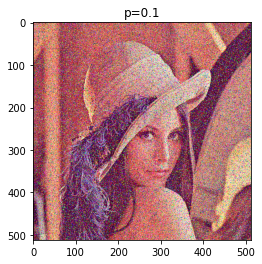

In [10]:
plt.imshow(solt_n_pepper_probs[1]), plt.title("p=0.1")

(<matplotlib.image.AxesImage at 0x14cc649a0>, Text(0.5, 1.0, 'p=0.15'))

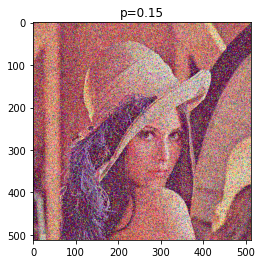

In [11]:
plt.imshow(solt_n_pepper_probs[2]), plt.title("p=0.15")

####Задча 8 (3 балла)
Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Визуализируйте изображение, представляющее собой разность полученных результатов фильтрации.

In [12]:
## your code here
def main(signal, n):
    kernel = np.ones((n, n)) * (1 / n ** 2)
    basis = np.ones(signal.shape)

    n, m = signal.shape
    n_, m_ = kernel.shape

    # precalculate matrix
    kernel_ = signal[:n_, :m_] * kernel
    basis[:n_, :m_] = kernel_.sum()

    for i in range(n - n_ + 1):
        for j in range(m - m_):
            # calculate new col to append
            c = signal[i:n_ + i, m_ + j] * (1 / (n_ * m_))

            # delete col from kernel_ and concatenate new one
            kernel_ = kernel_[:, 1:]
            kernel_ = np.c_[kernel_, c]

            # update weights
            basis[i:n_ + i, m_ + j] = kernel_.sum()

        if i == (n - n_):
            break

        # calculate new row to append
        c = signal[n_ + i, :m_] * (1 / (n_ * m_))

        # delete row from kernel_ and concatenate new one
        kernel_ = kernel_[1:, :]
        kernel_ = np.vstack((kernel_, c))

        # update weights
        basis[n_ + i, :m_] = kernel_.sum()
    return basis


# lower resolution and cvt to gray
lena_8 = copy.deepcopy(lena)
shape = np.array(lena_8.shape)
shape[0] = shape[0] // 2 ** 2
shape[1] = shape[1] // 2 ** 2

lena_8 = cv.resize(lena_8, shape[0:2])
lena_8 = cv.cvtColor(lena_8, cv.COLOR_RGB2GRAY)

img5 = main(lena_8, 5)
img3 = main(lena_8, 3)
img_diff = np.abs(img5 - img3)


(<AxesSubplot: title={'center': 'img5'}>,
 Text(0.5, 1.0, 'img5'))

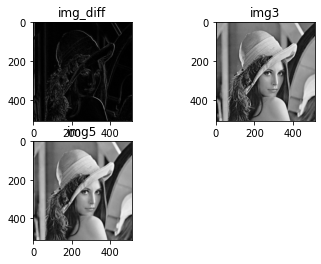

In [13]:
plt.subplot(221), plt.imshow(img_diff, 'gray'), plt.title("img_diff")
plt.subplot(222), plt.imshow(img3, 'gray'), plt.title("img3")
plt.subplot(223), plt.imshow(img5, 'gray'), plt.title("img5")

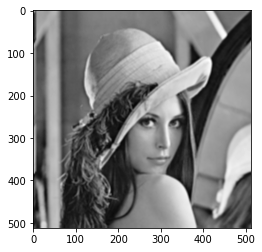

In [14]:
plt.imshow(img5, 'gray')

####Задача 9 (6 баллов) 
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. Отдельно выведите изображение **lena** с гаммой равной 2.

$\displaystyle V_{\text{out}}=AV_{\text{in}}^{\gamma }$

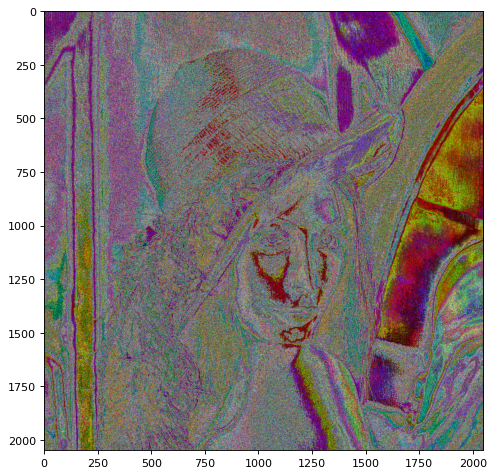

In [15]:
## your code here
lena_9 = copy.deepcopy(lena)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(A, y):
    plt.figure(figsize=(16, 16), dpi=80)
    plt.subplot(221), plt.imshow((A * lena_9 ** y).astype(np.uint8))

f(1, 2)

In [17]:
interact(f, A=widgets.FloatSlider(min=0, max=1, step=0.1, value=1), y=widgets.FloatSlider(min=0, max=4, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='A', max=1.0), FloatSlider(value=1.0, description='y'…

<function __main__.f(A, y)>